In [50]:
import seaborn as sns
import pandas as pd

In [52]:
import numpy as np

In [22]:
import os
loc = '/checkpoint/koustuvs/compositionality/'

In [23]:
step = 'step_2'
dir_loc = os.path.join(loc, step)
s1_train = open(os.path.join(dir_loc, 's1.train')).readlines()
s2_train = open(os.path.join(dir_loc, 's2.train')).readlines()
s1_dev = open(os.path.join(dir_loc, 's1.dev')).readlines()
s2_dev = open(os.path.join(dir_loc, 's2.dev')).readlines()
s1_test = open(os.path.join(dir_loc, 's1.test')).readlines()
s2_test = open(os.path.join(dir_loc, 's2.test')).readlines()


In [24]:
train_words = []
train_sent = s1_train + s2_train
for sent in train_sent:
    ws = sent.rstrip().split(' ')
    noun_verb = [w for w in ws if ('N' in w) or ('V' in w)]
    train_words.extend(noun_verb)
    

In [25]:
train_words = list(set(train_words))

In [26]:
dev_words = []
dev_sent = s1_dev + s2_dev
for sent in dev_sent:
    ws = sent.rstrip().split(' ')
    noun_verb = [w for w in ws if ('N' in w) or ('V' in w)]
    dev_words.extend(noun_verb)
dev_words = list(set(dev_words))

In [27]:
set(train_words) - set(dev_words)

set()

In [28]:
test_words = []
test_sent = s1_test + s2_test
for sent in test_sent:
    ws = sent.rstrip().split(' ')
    noun_verb = [w for w in ws if ('N' in w) or ('V' in w)]
    test_words.extend(noun_verb)
test_words = list(set(test_words))

In [29]:
len(test_words)

462

In [30]:
len(train_words)

1140

In [151]:
with open('/checkpoint/koustuvs/compositionality/train_words.txt','w') as fp:
    for word in train_words:
        fp.write(word + '\n')

In [154]:
len(test_words)

462

In [155]:
with open('/checkpoint/koustuvs/compositionality/test_words.txt','w') as fp:
    for word in test_words:
        fp.write(word + '\n')

In [31]:
import torch

In [32]:
len(train_words)

1140

In [33]:
len(test_words)

462

In [34]:
len(step_0_w)

562

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [36]:
def reduce_dim(vocab_dict, train_words, test_words, mode='all',alg='tsne'):
    labels = []
    tokens = []

    for word in vocab_dict:
        if mode == 'train':
            words = train_words
        elif mode == 'test':
            words = test_words
        else:
            words = train_words + test_words
        #if word in words:
        tokens.append(vocab_dict[word])
        if word in train_words:
            labels.append(word + '_t')
        else:
            labels.append(word + '_s')
    
    if alg == 'tsne':
        model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=23)
        new_values = model.fit_transform(tokens)
    else:
        model = PCA(n_components=2, whiten=True)
        new_values = model.fit(tokens).transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    return x,y, labels

In [38]:
step = 'step_0'

In [39]:
wloc = '/checkpoint/koustuvs/compositionality/outputs/exp_seed_99/'
step_0_w = torch.load(wloc + step + '/InnerAttentionMILAEncoder_model.pkl.wordvec')

In [40]:
step_0_w['N0.0'].shape

(300,)

In [41]:
x_0,y_0,labels_0 = reduce_dim(step_0_w, random.sample(train_words, len(test_words)), test_words)

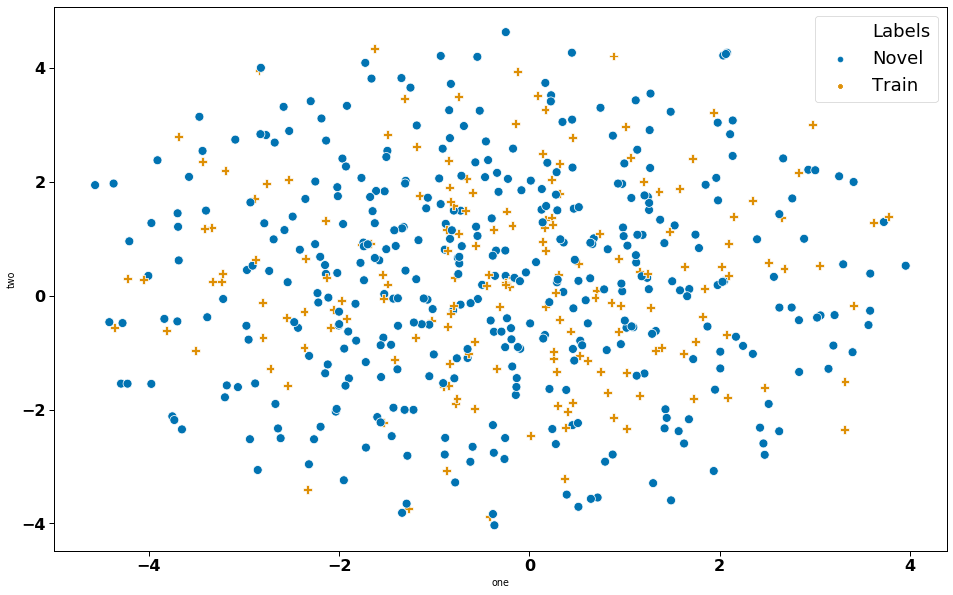

In [54]:
df = pd.DataFrame({'one': x_0, 'two': y_0, 'Labels': ['Novel' if t.split('_')[-1] == 's' else 'Train' for t in labels_0]})
plt.figure(figsize=(16,10))
ax = plt.subplot()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(16)
    label.set_fontweight('semibold')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,10))
ax.xaxis.get_offset_text().set_fontsize(16)
axis_font = {'fontname':'Arial', 'size':'5'}
sns.scatterplot(
    x="one", y="two",
    hue="Labels",
    palette=sns.color_palette("colorblind", 2),
    data=df,
    legend="full",
    alpha=1,
    style="Labels",
    s=80,
    markers=['o','P']
)
ax.legend(loc="upper right", prop={'size' : 18})

In [43]:
step = 'step_2'

wloc = '/checkpoint/koustuvs/compositionality/outputs/exp_seed_99/'
step_2_w = torch.load(wloc + step + '/InnerAttentionMILAEncoder_model.pkl.wordvec')

In [44]:
x_2,y_2,labels_2 = reduce_dim(step_2_w, random.sample(train_words, len(test_words)), test_words)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


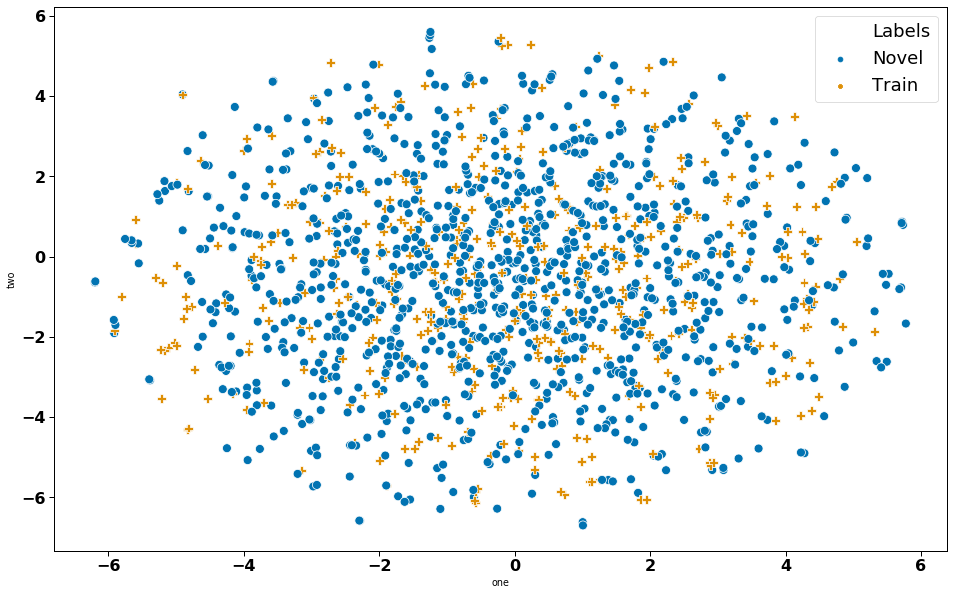

In [53]:
df = pd.DataFrame({'one': x_2, 'two': y_2, 'Labels': ['Novel' if t.split('_')[-1] == 's' else 'Train' for t in labels_2]})
plt.figure(figsize=(16,10))
ax = plt.subplot()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(16)
    label.set_fontweight('semibold')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,10))
ax.xaxis.get_offset_text().set_fontsize(16)
axis_font = {'fontname':'Arial', 'size':'5'}
sns.scatterplot(
    x="one", y="two",
    hue="Labels",
    palette=sns.color_palette("colorblind", 2),
    data=df,
    legend="full",
    alpha=1,
    style="Labels",
    markers=['o','P'],
    s=80
)
ax.legend(loc="upper right", prop={'size' : 18})

In [51]:
sns.set_context('paper')

In [244]:
train_mean = np.mean([w for k,w in step_0_w.items() if k in train_words],axis=1)
test_mean = np.mean([w for k,w in step_0_w.items() if k in test_words],axis=1)

In [245]:
mean.shape

(562,)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [114]:
np.linalg.norm(step_0_w['N97.1'])

18.48899

In [16]:
import random

In [17]:
from tqdm.notebook import tqdm

In [19]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [20]:
xax = np.zeros(300)

In [21]:
xax[0]=1

In [22]:
def get_angle(v):
    return np.dot(v,xax) / (np.linalg.norm(v) * np.linalg.norm(xax))

In [23]:
np.linalg.norm(xax)

1.0

In [141]:
tms = 10000
step_dict = step_2_w
# sample the trained words
dst = []
da = []
pb = tqdm(total=tms)
step_train_words = list(set(train_words).intersection(set(step_dict.keys())))
step_test_words = list(set(test_words).intersection(set(step_dict.keys())))
print("Train words : {}".format(len(step_train_words)))
print("Test words : {}".format(len(step_test_words)))
k = len(step_test_words)
for l in range(tms):
    sample_train = [random.choice(step_train_words) for i in range(k)]
    norms = [np.linalg.norm(step_dict[r]) for r in sample_train]
    angles = [angle_between(step_dict[r], xax) for r in sample_train]
    dst.append(np.mean(norms))
    da.append(np.mean(angles))
    pb.update(1)
pb.close()

Train words : 1140
Test words : 462



In [142]:
novel_dst = np.mean([np.linalg.norm(step_dict[r]) for r in step_test_words])
novel_da = np.mean([angle_between(step_dict[r], xax) for r in step_test_words])

In [143]:
# calculate mean(r_i) > mean(test)
r_len = len([1 for p in dst if p > novel_dst])
r_ang = len([1 for p in da if p > novel_da])
p_len = (r_len + 1) / tms
p_ang = (r_ang + 1) / tms

In [144]:
len(da)

10000

In [139]:
p_len

0.1685

In [140]:
p_ang

0.4188

In [145]:
p_len

0.8631

In [146]:
p_ang

0.0675

In [58]:
da[0]

1.5728539198110474

In [59]:
novel_da

1.5750577411318205

In [44]:
p_ang

0.06804

In [249]:
p_len

0.86024

In [250]:
novel_da

1.5750577411318205

In [43]:
p_len

0.85892

In [252]:
r_len

86023

In [253]:
len(test_words)

462

In [42]:
p_len = (r_len) / tms
p_ang = (r_ang
        ) / tms

In [194]:
dst = np.array(dst)

In [146]:
dst = np.mean(dst, axis=0)

In [257]:
len(dst)

100000

In [258]:
len(train_words)

1140

In [259]:
len(test_words)

462

In [47]:
# novel_dst = [np.linalg.norm(step_0_w[r]) for r in test_words]
novel_da = [angle_between(step_0_w[r], xax) for r in test_words]

In [50]:
train_da = [angle_between(step_0_w[r], xax) for r in train_words]

In [66]:
from scipy import stats

In [67]:
def ttest(dista, distb):
    s = np.std(dista + distb)
    t = (np.mean(dista) - np.mean(distb)) / (s * np.sqrt(1/k))
    df = 2*k - 2
    p = 1 - stats.t.cdf(t,df=df)
    return t,p

In [68]:
ttest(da, [angle_between(step_0_w[r], xax) for r in test_words])

(-17.933475510175253, 1.0)

In [261]:
ttest(dst, novel_dst)

(13.423184305921538, 0.0)

In [262]:
ttest(da, novel_da)

(-17.83522502930611, 1.0)

In [263]:
len(dst)

100000

In [152]:
t

1.014065186613687

In [134]:
from scipy import stats

In [153]:
df = 2*k - 2

In [154]:
p = 1 - stats.t.cdf(t,df=df)

In [155]:
p

0.15540884079095674

In [45]:
get_angle(step_0_w['N0.0'])

-0.01657230223263506

In [46]:
angle_between(step_0_w['N0.0'], xax)

1.5873693876688424

In [238]:
p_len

0.86024

In [264]:
### compute similarity scores between pairs of vectors from train and test

In [158]:
from scipy.spatial.distance import cosine, euclidean
cos_sim = []
euc_dist = []
step_dict = step_2_w
# sample the trained words
step_train_words = list(set(train_words).intersection(set(step_dict.keys())))
step_test_words = list(set(test_words).intersection(set(step_dict.keys())))
pb = tqdm(total=len(step_train_words))
for train_word in step_train_words:
    for test_word in step_test_words:
        cos_sim.append(cosine(step_dict[train_word],step_dict[test_word]))
        euc_dist.append(euclidean(step_dict[train_word],step_dict[test_word]))
    pb.update(1)

In [266]:
len(step_0_w['all'])

300

In [159]:
np.mean(cos_sim)

0.9999604633409763

In [160]:
np.std(cos_sim)

0.05875788969136105

In [161]:
np.mean(euc_dist)

24.510517537017126

In [163]:
np.std(euc_dist)

1.0336911135018638